In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from plotting import *
from PatientVec.Experiments.hyperparam_exps import *

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
def get_yr_df(data_name) :
    yr_df = []
    for model in ['Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
        name = os.path.join('outputs/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            for d in sorted(dirs) :
                if 'pretrained' in d.lower() or 'replicate' in d.lower() or 'balanced' in d.lower(): continue
                dirname = os.path.join(name, d)
                model_name = get_latest_model(dirname)
                if model_name is not None :
                    df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                    vals = {k:v for k, v in df.items()}
                    vals['model'] = d
                    vals['type'] = model
                    vals['encoder'] = d.split('+')[0].split('(')[0]
                    vals['structured'] = 'Structured' in d
                    yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    return yr_df

['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9']

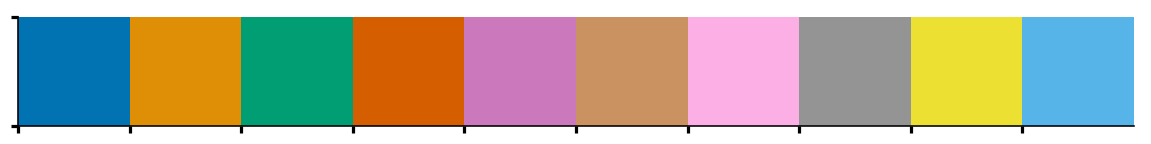

In [4]:
sns.palplot(sns.color_palette())
sns.color_palette().as_hex()

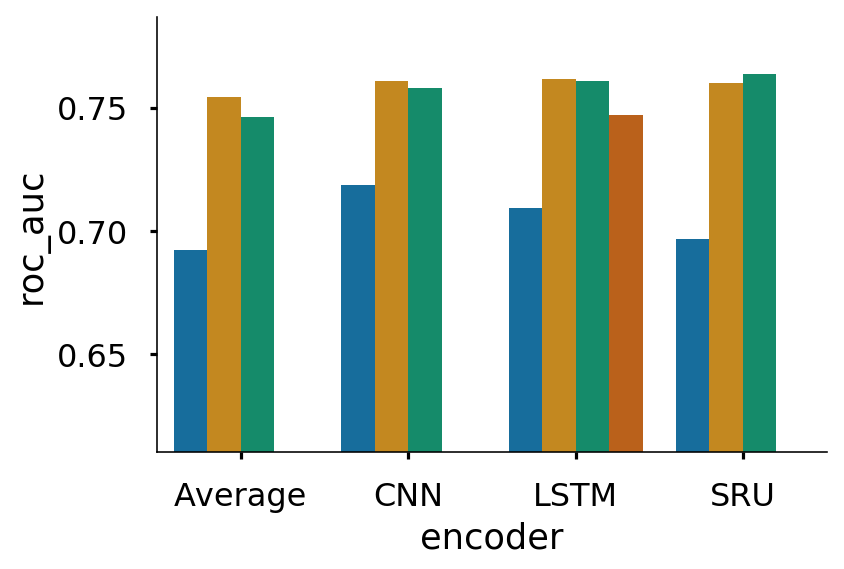

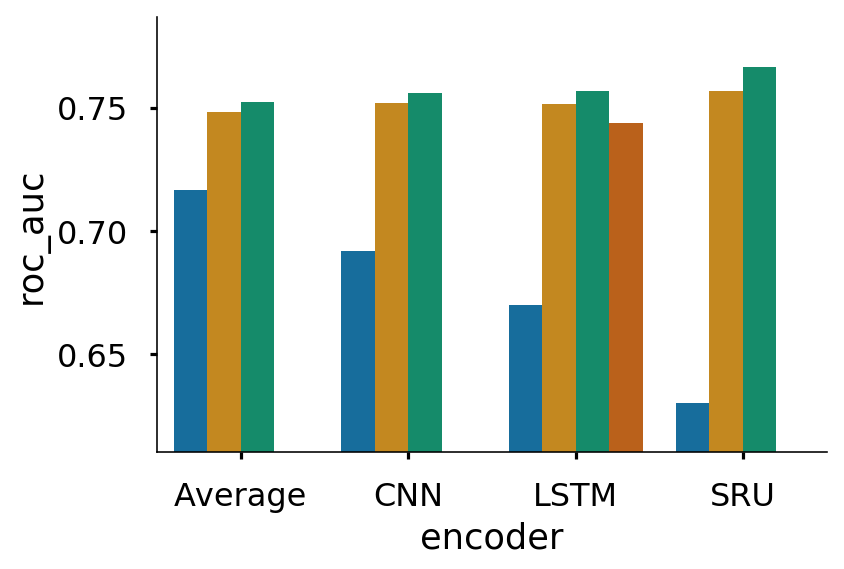

In [12]:
name = 'Readmission'
df_readmission = get_yr_df(name)
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == True])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_structured.pdf')
plt.show()
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == False])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_unstructured.pdf')

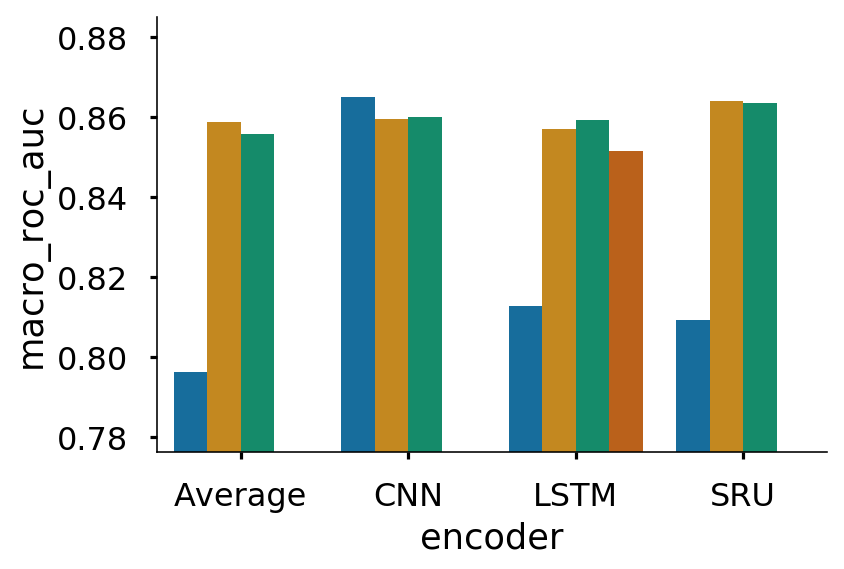

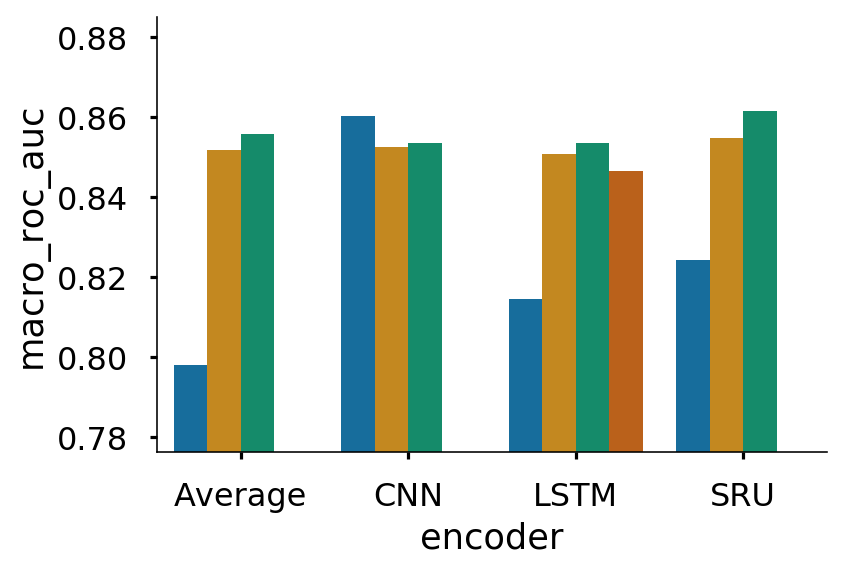

In [13]:
name = 'Diagnosis'
df_readmission = get_yr_df(name)
fig = sns.barplot(x='encoder', y='macro_roc_auc', hue='type', data=df_readmission[df_readmission.structured == True])
fig.axes.set_ylim(min(df_readmission.macro_roc_auc)-0.02, max(df_readmission.macro_roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_structured.pdf')
plt.show()
fig = sns.barplot(x='encoder', y='macro_roc_auc', hue='type', data=df_readmission[df_readmission.structured == False])
fig.axes.set_ylim(min(df_readmission.macro_roc_auc)-0.02, max(df_readmission.macro_roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_unstructured.pdf')

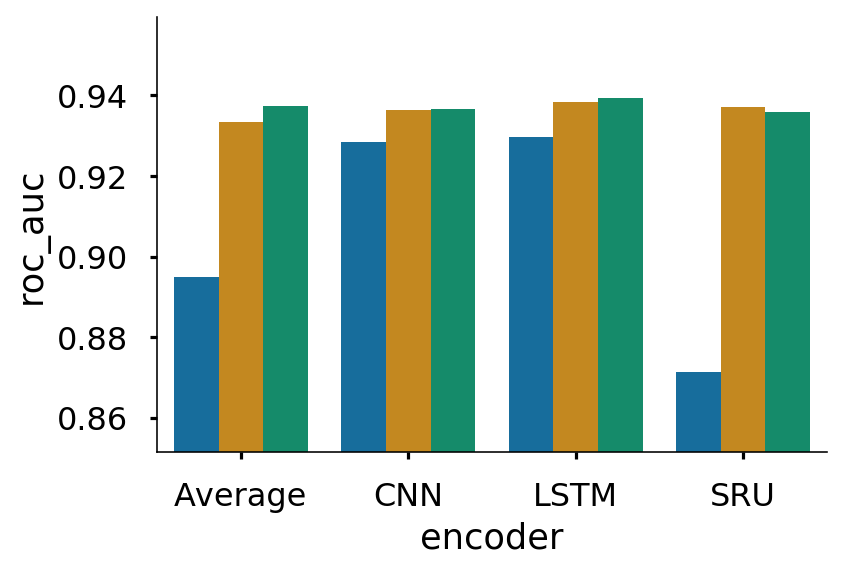

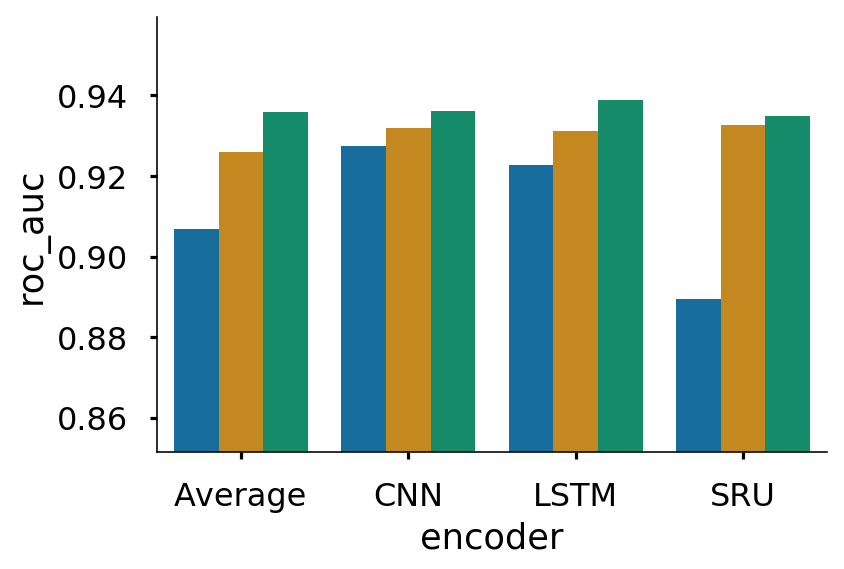

In [14]:
name = 'Mortality_30day'
df_readmission = get_yr_df(name)
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == True])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_structured.pdf')
plt.show()
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == False])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_unstructured.pdf')

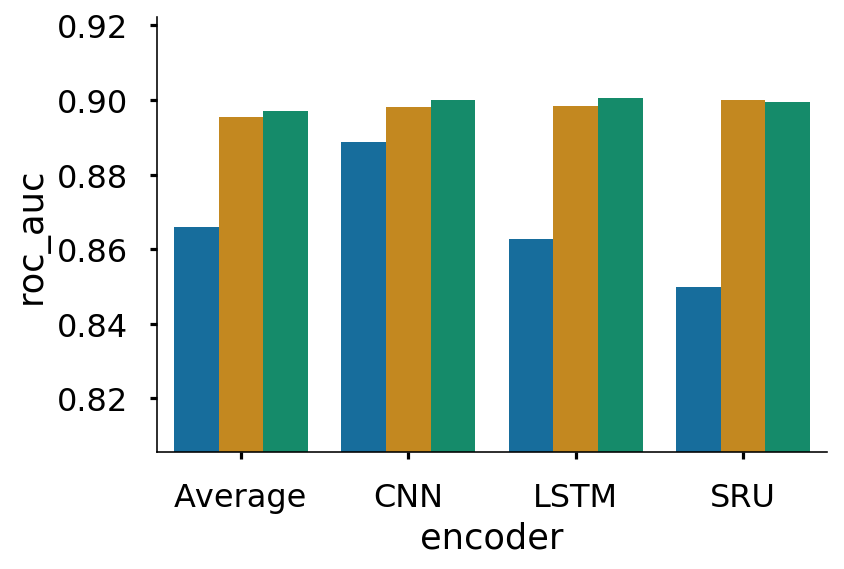

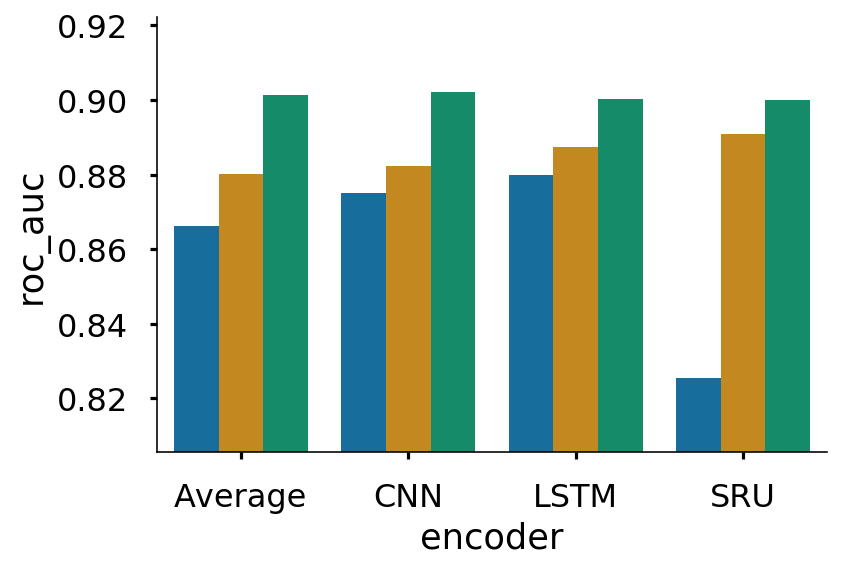

In [15]:
name = 'Mortality_1yr'
df_readmission = get_yr_df(name)
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == True])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_structured.pdf')
plt.show()
fig = sns.barplot(x='encoder', y='roc_auc', hue='type', data=df_readmission[df_readmission.structured == False])
fig.axes.set_ylim(min(df_readmission.roc_auc)-0.02, max(df_readmission.roc_auc)+0.02)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_unstructured.pdf')